In [82]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [83]:
%matplotlib inline

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Analysis of Top Investment Banks

---

## Research Questions to Answer:

<div class="alert alert-block alert-success">
    <ul>
        <li>What are the largest investment banks by market share and how did they trend during a five-year window?</li>
        <li>What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees?</li>
        <li>How big of a portion of these banks non-interest income are IB fees?</li>  
        <li>What do measures of central tendency and standard deviation tell us about the results?</li>
    </ul>
</div>

---

## Obstacles: 

<div class="alert alert-block alert-info">
    <ul>
        <li>2022 numbers were not yet available for all banks.</li>
        <li>Numbers represented are in millions</li>
        <li>We used 10-Ks from the SEC's Edgar database where possible. For banks outside the US, we used annual reports. </li> 
        <li>Each bank has numerous amounts of legal entities, subsidiaries, and lines of business </li>
    </ul>
</div>

---

In [86]:
bank_data_to_load = "DATA/final_bank_data.csv"
bank_data_df = pd.read_csv(bank_data_to_load)

In [87]:
color_scheme = ["darkred","orange","purple","green","darkblue","pink","darkgreen","red","teal","blue",]
year = [year for year in bank_data_df["Fiscal Year"].unique()]
x_tick_locations = [value for value in year]

## What are the largest investment banks by market share and how did they trend during a five-year window?

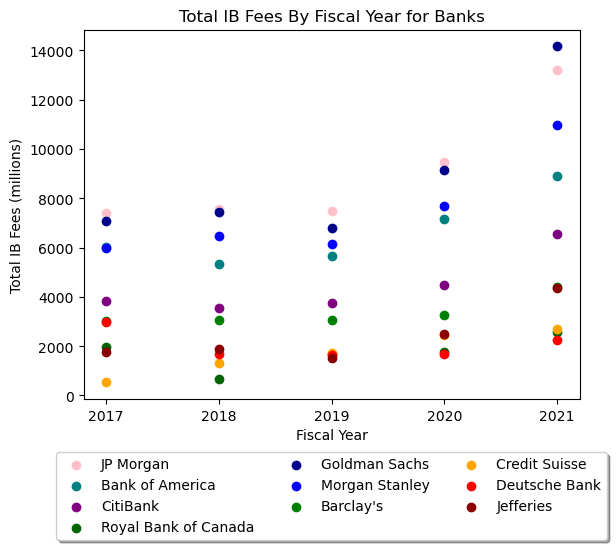

In [88]:
jeff_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['Total IB Fees']]
suisse_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['Total IB Fees']]
citi_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['Total IB Fees']]
bar_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['Total IB Fees']]
gs_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['Total IB Fees']]
jp_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['Total IB Fees']]
rbc_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['Total IB Fees']]
deutsche_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['Total IB Fees']]
bac_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['Total IB Fees']]
ms_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['Total IB Fees']]

fig1, ax1 = plt.subplots()

plt.scatter(year,jp_plot_df, marker ='o', color = color_scheme[5], label="JP Morgan")
plt.scatter(year,bac_plot_df, marker='o', color = color_scheme[8], label="Bank of America")
plt.scatter(year,citi_plot_df, marker ='o', color = color_scheme[2], label="CitiBank")
plt.scatter(year,rbc_plot_df, marker ='o', color = color_scheme[6], label="Royal Bank of Canada")
plt.scatter(year,gs_plot_df, marker ='o', color = color_scheme[4], label="Goldman Sachs")
plt.scatter(year,ms_plot_df, marker='o', color = color_scheme[9], label="Morgan Stanley")
plt.scatter(year,bar_plot_df, marker ='o', color = color_scheme[3], label="Barclay's")
plt.scatter(year,suisse_plot_df, marker ='o', color = color_scheme[1], label="Credit Suisse")
plt.scatter(year, deutsche_plot_df, marker='o', color = color_scheme[7], label="Deutsche Bank")
plt.scatter(year, jeff_plot_df, marker ='o', color = color_scheme[0], label="Jefferies")
   
plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.title("Total IB Fees By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)
plt.show()


## What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees??

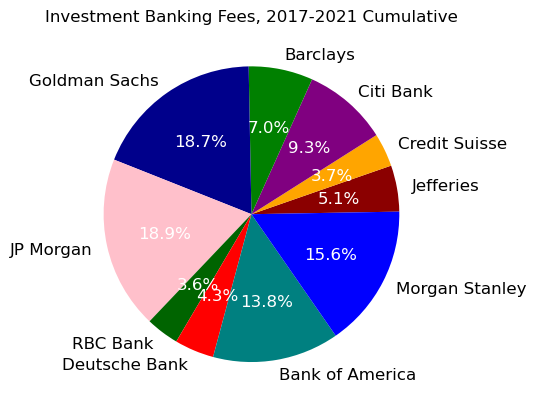

In [89]:
bank_list = ['Jefferies', 'Credit Suisse', 'Citi Bank', 'Barclays',
       'Goldman Sachs', 'JP Morgan', 'RBC Bank', 'Deutsche Bank',
       'Bank of America', 'Morgan Stanley']
bank_pie = np.array([jeff_plot_df['Total IB Fees'].sum(), suisse_plot_df['Total IB Fees'].sum(),
                     citi_plot_df['Total IB Fees'].sum(), bar_plot_df['Total IB Fees'].sum(),
                     gs_plot_df['Total IB Fees'].sum(), jp_plot_df['Total IB Fees'].sum(),
                     rbc_plot_df['Total IB Fees'].sum(), deutsche_plot_df['Total IB Fees'].sum(),
                     bac_plot_df['Total IB Fees'].sum(), ms_plot_df['Total IB Fees'].sum() ])
_,_,inner_text = plt.pie(bank_pie, startangle=1, labels=bank_list, autopct='%1.1f%%',
                         textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)
plt.title("Investment Banking Fees, 2017-2021 Cumulative")
plt.show()

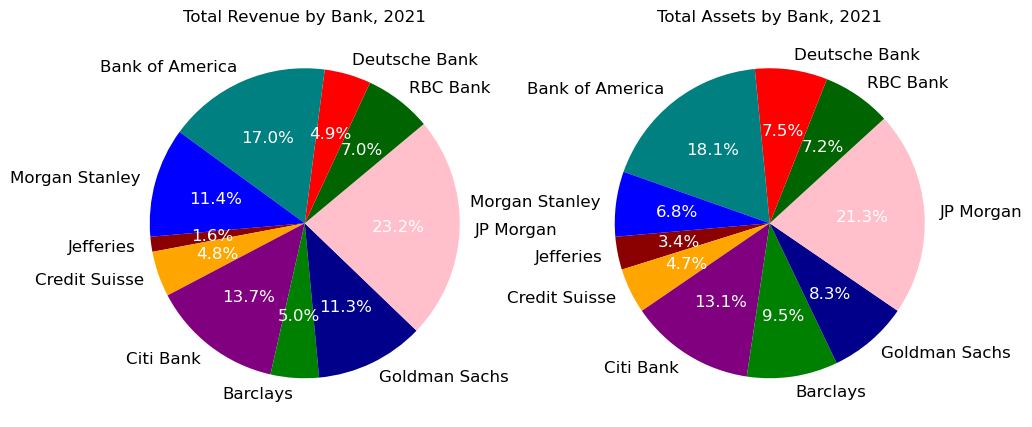

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,11))

revenue_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
revenue_list = []
for row in revenue_2021.iterrows():
    bank_list = revenue_2021['Bank']
    revenue_list = revenue_2021['Total Revenue']
TR_pie = np.array(revenue_list)
ax1.set_title("Total Revenue by Bank, 2021")
_,_,inner_text = ax1.pie(revenue_list, startangle=185,labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)
[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

assets_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
assets_list = []
for row in assets_2021.iterrows():
    bank_list = assets_2021['Bank']
    assets_list = assets_2021['Total Assets']
assets_pie = np.array(assets_list)
ax2.set_title("Total Assets by Bank, 2021")
_,_,inner_text = ax2.pie(assets_list, startangle=185, labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

plt.show()

## How big of a portion of these banks non-interest income are IB fees?

In [91]:
jeff_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['IB Fees as a % of Non-Interest Income']]
jeff_percent_df = jeff_percent_df.iloc[::-1]

suisse_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['IB Fees as a % of Non-Interest Income']]
suisse_percent_df = suisse_percent_df.iloc[::-1]

citi_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['IB Fees as a % of Non-Interest Income']]
citi_percent_df = citi_percent_df.iloc[::-1]
                                                                        
bar_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['IB Fees as a % of Non-Interest Income']]
bar_percent_df = bar_percent_df.iloc[::-1]

gs_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['IB Fees as a % of Non-Interest Income']]
gs_percent_df = gs_percent_df.iloc[::-1]

jp_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['IB Fees as a % of Non-Interest Income']]
jp_percent_df = jp_percent_df.iloc[::-1]
                                                                
rbc_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['IB Fees as a % of Non-Interest Income']]
rbc_percent_df = rbc_percent_df.iloc[::-1]

deutsche_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['IB Fees as a % of Non-Interest Income']]
deutsche_percent_df = deutsche_percent_df.iloc[::-1]

bac_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['IB Fees as a % of Non-Interest Income']]
bac_percent_df = bac_percent_df.iloc[::-1]

ms_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['IB Fees as a % of Non-Interest Income']]
ms_percent_df = ms_percent_df.iloc[::-1]

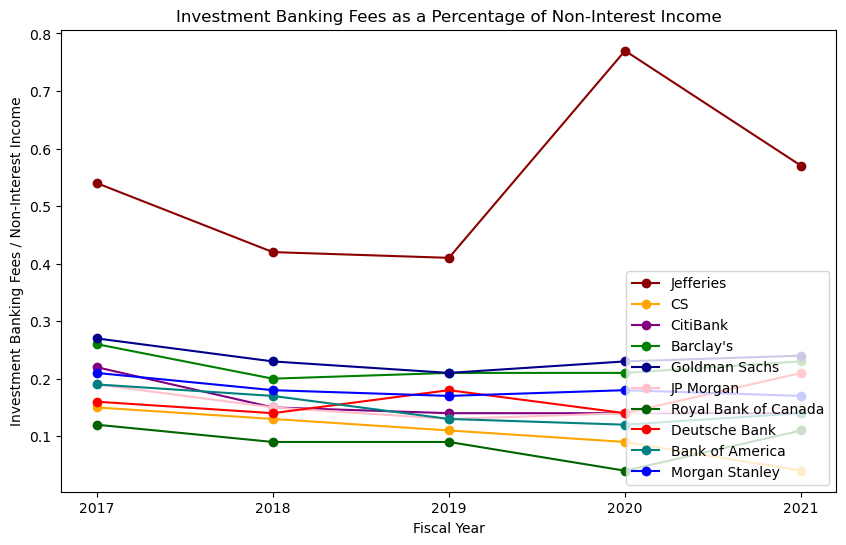

In [92]:
plt.figure(figsize=(10,6))
              
jeff_percent = plt.plot(year, jeff_percent_df, marker ='o', color = color_scheme[0], label="Jefferies")
suisse_percent = plt.plot(year, suisse_percent_df, marker ='o', color = color_scheme[1], label="CS")
citi = plt.plot(year, citi_percent_df, marker ='o', color = color_scheme[2], label="CitiBank")
bar = plt.plot(year, bar_percent_df, marker ='o', color = color_scheme[3], label="Barclay's")
gs = plt.plot(year, gs_percent_df, marker ='o', color = color_scheme[4], label="Goldman Sachs")
jp = plt.plot(year, jp_percent_df, marker ='o', color = color_scheme[5], label="JP Morgan")
rbc = plt.plot(year, rbc_percent_df, marker ='o', color = color_scheme[6], label="Royal Bank of Canada")
d = plt.plot(year, deutsche_percent_df, marker='o', color = color_scheme[7], label="Deutsche Bank")
bac = plt.plot(year, bac_percent_df, marker='o', color = color_scheme[8], label="Bank of America")
ms = plt.plot(year, ms_percent_df, marker='o', color = color_scheme[9], label="Morgan Stanley")

plt.xticks(x_tick_locations)
plt.title("Investment Banking Fees as a Percentage of Non-Interest Income")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees / Non-Interest Income")
legend = plt.legend(loc='lower right')

plt.show()



## What are some statistical trends in the data?

The r-value is : 0.3102789280393081


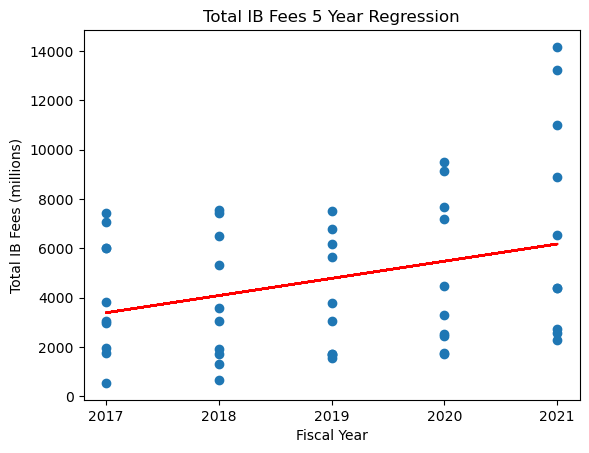

In [93]:
def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(bank_data_df["Fiscal Year"], bank_data_df["Total IB Fees"])
annotate(equation, 0, -3)
 
plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.title("Total IB Fees 5 Year Regression")

plt.show()

## In conclusion, we found that the banks at the top of IB , for the past half decade, normally do not move much in overall market share, with more variability surrounding the lower market shares: although smaller investment bank income does not necessarily mean a smaller income statement or balance sheet. We also found that for pretty much all the top investment banks, IB fees make up about the same amount of non-interest income each year, with the exception being Jefferies. It is evident that there is a general trend of investment banking increase over the five year period, even throughout the pandemic, which we found to be interesting. 